# [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

## [Abstract](#abstract)

The Traveling Salesman Problem (TSP) is a **classic problem in [combinatorial optimization](https://en.wikipedia.org/wiki/Combinatorial_optimization)**.

It is the problem of **finding a tour of minimum cost that visits each city exactly once**. The TSP is **NP-hard**. That is, no efficient algorithm is known that finds the optimal solution to the problem for large sets of cities.

## [Exhaustive Search](#exhaustive-search)
It is a **brute force** algorithm that does not use any information about the problem to find the solution.

- [Heap's Algorithm](#heaps-algorithm)
- [Steinhaus–Johnson–Trotter Algorithm](#sjt-algorithm)

## [Random](#random-search)
Is a **[stochastic optimization](https://en.wikipedia.org/wiki/Stochastic_optimization)** algorithm that does not use any information about the problem to find the solution.

## [Hill Climbing](#hill-climbing-search)
Is a **[local search](https://en.wikipedia.org/wiki/Local_search_(optimization))** algorithm that does not use any information about the problem to find the solution.

## Simulated Annealing (not implemented yet)
Is a **[metaheuristic](https://en.wikipedia.org/wiki/Metaheuristic)** algorithm that does not use any information about the problem to find the solution.

----

### Abstract

In this notebook, we're exploring various techniques to solve the [Traveling Salesman Problem (TSP)](https://en.wikipedia.org/wiki/Travelling_salesman_problem).

Our focus is on implementing **exhaustive search**, **random search**, and **hill-climbing algorithms** to tackle this problem. Additionally, **we'll visualize the results of each iteration**, **analyze their performance**, and **draw insightful conclusions**.

By delving into these algorithms and their outcomes, we aim to enhance our understanding of optimization techniques and their practical applications.

Time Complexity: $O(n!)$
Space Complexity: $O(n)$

In [10]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# constants
CITIES = 10  # number of cities
POPULATION_SIZE = 100  # number of individuals in population
GENERATIONS = 100  # number of generations to run
MUTATION_RATE = 0.01  # mutation rate (0.01 = 1%)

In [18]:
# functions
def generate_cities(cities: int) -> np.ndarray:
    """Generate cities with random x and y coordinates."""
    return np.random.rand(cities, 2)

def get_distance_between_cities(city1: np.ndarray, city2: np.ndarray) -> float:
    """Get distance between two cities."""
    return np.sqrt((city1[0] - city2[0]) ** 2 + (city1[1] - city2[1]) ** 2)





def calculate_fitness(cities: np.ndarray, population: np.ndarray) -> np.ndarray:
    """Calculate fitness of population."""
    return 1 / get_distance_between_cities(cities, population)

def select_parents(population: np.ndarray, fitness: np.ndarray) -> np.ndarray:
    """Select parents from population."""
    return np.random.choice(population, size=2, replace=False, p=fitness / np.sum(fitness))

def crossover(parents: np.ndarray) -> np.ndarray:
    """Crossover parents to produce offspring."""
    return np.concatenate((parents[0][:CITIES // 2], [city for city in parents[1] if city not in parents[0][:CITIES // 2]]))

def mutate(offspring: np.ndarray) -> np.ndarray:
    """Mutate offspring."""
    if np.random.rand() < MUTATION_RATE:
        offspring = np.random.permutation(offspring)
    return offspring

def generate_offspring(population: np.ndarray, fitness: np.ndarray) -> np.ndarray:
    """Generate offspring from population."""
    parents = select_parents(population, fitness)
    offspring = crossover(parents)
    offspring = mutate(offspring)
    return offspring

def generate_new_population(population: np.ndarray, fitness: np.ndarray) -> np.ndarray:
    """Generate new population from population."""
    new_population = np.empty((POPULATION_SIZE, CITIES), dtype=int)
    for i in range(POPULATION_SIZE):
        new_population[i] = generate_offspring(population, fitness)
    return new_population

def plot_best_solution(cities: np.ndarray, population: np.ndarray) -> None:
    """Plot best solution."""
    plt.figure(figsize=(10, 10))
    plt.scatter(cities[:, 0], cities[:, 1], c='red', s=100)
    plt.plot(cities[population[0], 0], cities[population[0], 1], c='blue')
    plt.show()

def plot_fitness(fitness: np.ndarray) -> None:
    """Plot fitness."""
    plt.figure(figsize=(10, 10))
    plt.plot(fitness)
    plt.show()

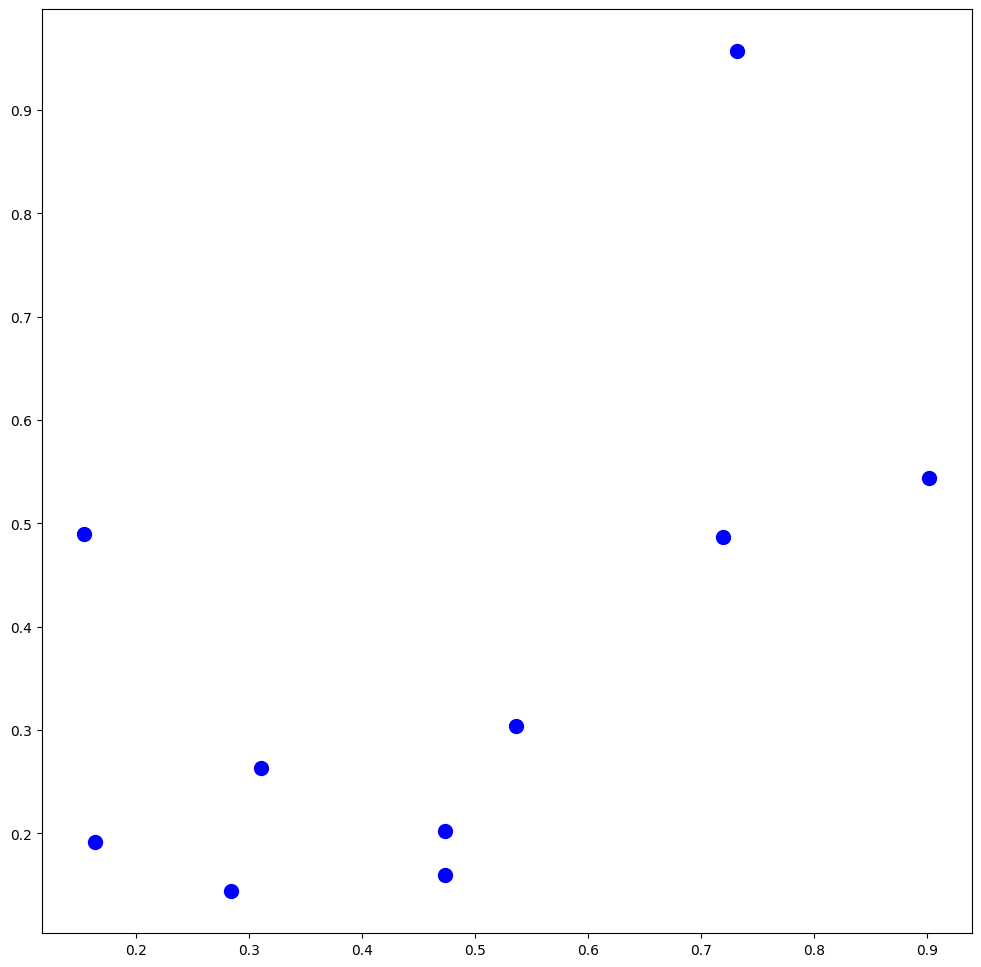

In [27]:
#  plot cities
cities = generate_cities(CITIES)
plt.figure(figsize=(12, 12))
plt.scatter(cities[:, 0], cities[:, 1], c='b', s=100)
plt.show()

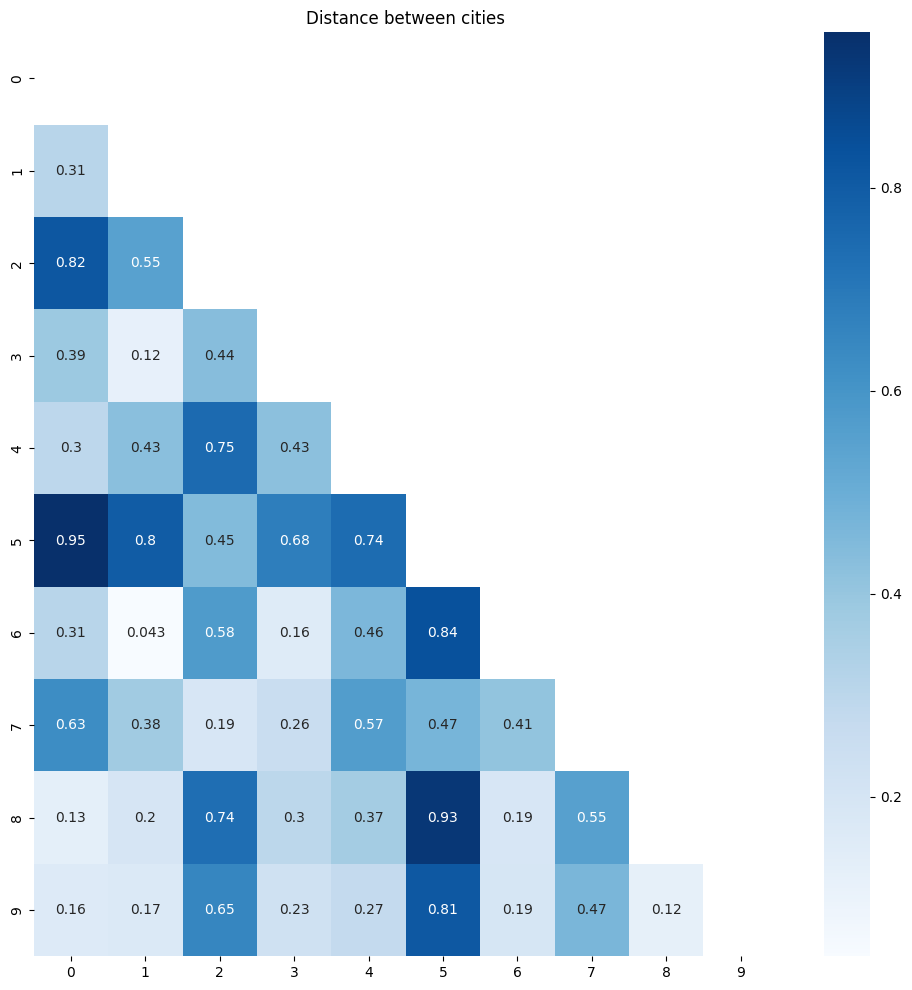

In [28]:
# plot the distance between cities (using heatmap)
distances = np.zeros((CITIES, CITIES))
for i in range(CITIES):
    for j in range(CITIES):
        distances[i, j] = get_distance_between_cities(cities[i], cities[j])
plt.figure(figsize=(12, 12))

mask = np.zeros_like(distances)  # create a mask
mask[np.triu_indices_from(mask)] = True  # apply the mask
sns.heatmap(distances, annot=True, mask=mask, cmap='Blues')  # plot heatmap
plt.title('Distance between cities')
plt.show()

### [Exhaustive Search](https://en.wikipedia.org/wiki/Exhaustive_search)

We implement a program that generates all possible solutions for the TSP using two algorithms, namely the **Heap algorithm** and the **Steinhaus–Johnson–Trotter algorithm**. By examining the complete solution space, we aim to evaluate the computational feasibility of exhaustively solving TSP for a given number of cities.

#### [Heap's Algorithm](https://en.wikipedia.org/wiki/Heap%27s_algorithm)


#### [SJT Algorithm](https://en.wikipedia.org/wiki/Steinhaus%E2%80%93Johnson%E2%80%93Trotter_algorithm)

### [Random Search](https://en.wikipedia.org/wiki/Random_search)

### [Hill Climbing Search](https://en.wikipedia.org/wiki/Hill_climbing)